In [1]:
import cv2 as cv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
plt.rc('image', cmap='gray')

In [3]:
Org=cv.imread("Samples/1.jpg")
Org=cv.resize(Org,(400,round(Org.shape[0]/Org.shape[1]*400)))
I=cv.cvtColor(Org,cv.COLOR_RGB2GRAY)
I= cv.GaussianBlur(I,(7,7),3)
#I= cv.Canny(I,50,150,apertureSize = 3)

#Filter horizontal Lines
I_Hor= cv.morphologyEx(I, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_RECT,(3,1)))
I_Hor= cv.morphologyEx(I_Hor, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_RECT,(5,1)))

I_Vert= cv.morphologyEx(I, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_RECT,(1,3)))
I_Vert= cv.morphologyEx(I_Vert, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_RECT,(1,5)))

I=(I_Hor+I_Vert)/2
I=np.array(abs(I-np.min(I)),dtype=np.uint8)
#I=cv.colorChange()
#I= cv.GaussianBlur(I,(7,7),1)
print(np.min(I))

0


11999


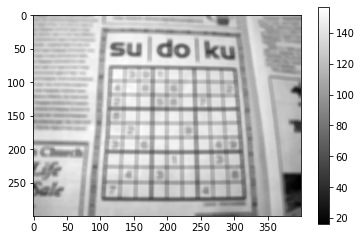

In [9]:
plt.imshow(I_Hor)
plt.colorbar()

sum=0
for r in I:
    for p in r:
        if p:
            sum+=1
print(sum)

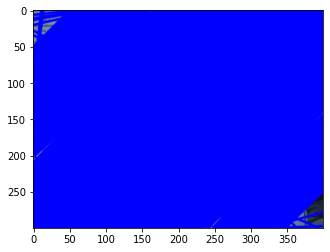

In [5]:
linesP = cv.HoughLinesP(I, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(Org, (l[0], l[1]), (l[2], l[3]), (0,0,255), 2, cv.LINE_AA)
plt.imshow(Org)

In [6]:
def drawline(I,p1,p2,val=255):

    dy = p2[0] - p1[0];
    dx = p2[1] - p1[1];


    step=dy
    if np.abs(dx)>np.abs(dy):
        step=dx


    #print(step)
    incX = dx/step
    incY = dy/step
    #print(incX,incY)
    
    y =yi= p1[0]
    x =xi= p1[1]

    if(step>0):
        for i in range(step+1):
            #print(xi,yi)
            I[xi,yi]=val
            x += incX;
            y += incY;
    
            xi,yi=np.round(x),np.round(y)
            xi,yi=np.int(xi),np.int(yi)
        
    
    else:
        y =yi= p2[0]
        x =xi= p2[1]
        for i in range(step,1):
            #print(xi,yi)
            I[xi,yi]=val
            x += incX;
            y += incY;
    
            xi,yi=np.round(x),np.round(y)
            xi,yi=np.int(xi),np.int(yi)



In [7]:
def line_energy(I,p1,p2):
    energy=0
    dy = p2[0] - p1[0];
    dx = p2[1] - p1[1];


    step=dy
    if np.abs(dx)>np.abs(dy):
        step=dx


    #print(step)
    incX = dx/step
    incY = dy/step
    #print(incX,incY)
    
    y =yi= p1[0]
    x =xi= p1[1]

    if(step>0):
        for i in range(step+1):
            #print(xi,yi)
            energy+=I[xi,yi]
            x += incX;
            y += incY;
    
            xi,yi=np.round(x),np.round(y)
            xi,yi=np.int(xi),np.int(yi)
        
    
    else:
        y =yi= p2[0]
        x =xi= p2[1]
        for i in range(step,1):
            #print(xi,yi)
            energy+=I[xi,yi]
            x += incX;
            y += incY;
    
            xi,yi=np.round(x),np.round(y)
            xi,yi=np.int(xi),np.int(yi)
            
    return energy/(np.max(I)*sq_distance((0,0),I.shape))

    
def distance(p1,p2):
    if (p1[0]-p2[0])*(p1[0]-p2[0])+(p1[1]-p2[1])*(p1[1]-p2[1]):
        return np.sqrt((p1[0]-p2[0])*(p1[0]-p2[0])+(p1[1]-p2[1])*(p1[1]-p2[1]))
    else:
        return 0.5

def e_func(p1,p2,I):
    return line_energy(I,p1,p2)+1/distance(p1,p2)

In [8]:
s1,s2=(0,9),(100,100)
I=np.ones((110,110))*255

drawline(I,(0,0),(100,100),0)
print(1000*e_func(s1,s2,I))

example=np.zeros((10,10))

for i in range(10,0,-1):
    print()
    for j in range(10,0,-1):
        print("%.2f" % e_func(I,(j,i),s2),i,j,end="|")
        example[i-1,j-1]=e_func(I,(j,i),s2)
    
drawline(I,s1,s2,200)
#plt.imshow(I)
plt.matshow(example,cmap="Pastel1")


NameError: name 'sq_distance' is not defined

In [ ]:
I=np.ones((110,110))*255
drawline(I,(0,0),(100,100),0)

from scipy.optimize import minimize
from scipy.optimize import Bounds

bounds = Bounds([0, 0], [I.shape[1], I.shape[0]])